In [1]:
username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")

  Activating project at `~/work/repo_ds/dynamical-systems/env/integrate`


plot_3d_2c_fp (generic function with 1 method)

In [2]:
"""username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual.jl");""";

In [253]:
time = 6000.0; tt = 0.0; tstep = 0.001;
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
u0 = zeros(6);
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [ ]:
"""for elem in dict
    println(elem);
end;"""
;

In [245]:
# Первое появление кисти
# I0 = -1.7802
# u0 = [0.9401953832084715, 0.7411256095987793, 0.7440065013659322, 0.05604540199363639, 0.014096429160725683, 0.005545273502305856]
;

In [336]:
param[11] =  -1.85

-1.85

In [341]:
println(tr[1])

[9.916334771244077, 0.4493327135110199, 0.8238994432355461, 9.586057235847873e-5, 0.026918144834761848, 0.00039124025946195865]


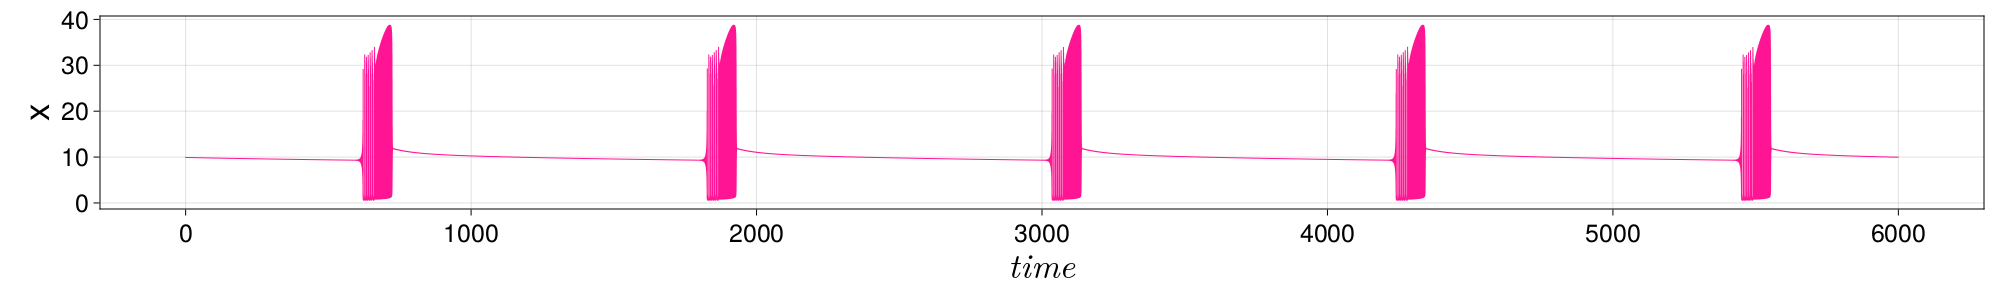

CairoMakie.Screen{IMAGE}


In [338]:
ds= CoupledODEs(TM6_glial_ECM, tr[end], param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Δt = tstep);
plot_timesereis(trange, tr[:, 1], 1, 6000000, width = 2000, height = 300, inter=false, lw = 1.0, color = :deeppink)

In [339]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(0.0, 1.0), interval(0.0, 1.0), interval(0.0, 1.0);
ecmr, pr = interval(0.0, 0.1), interval(0.0, 0.1);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-10, method = IntervalRootFinding.Krawczyk);

┌ Warning: Non-unique fixed points found!
└ @ ChaosTools /home/nova/.julia/packages/ChaosTools/Nr2Oq/src/stability/fixedpoints.jl:103


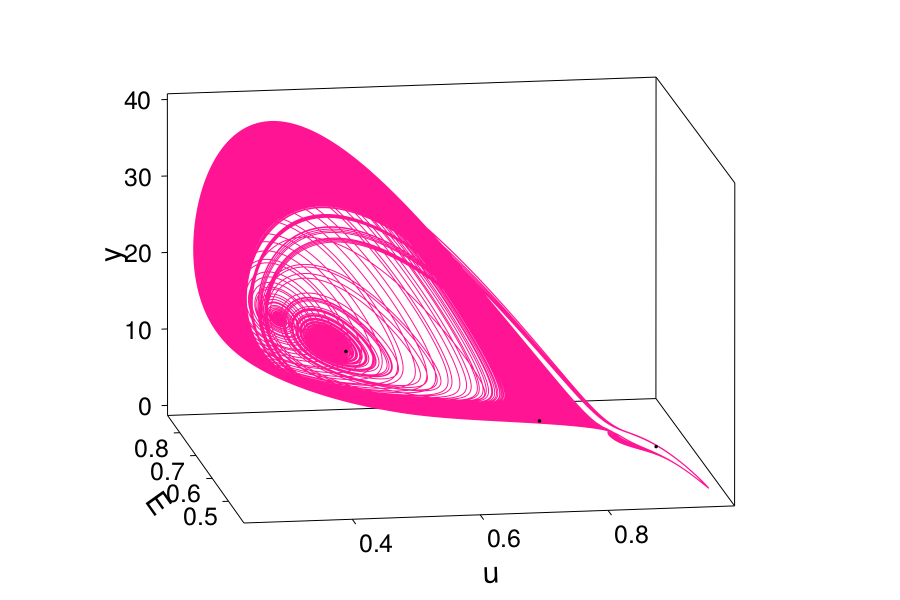

In [340]:
idx, idy, idz = 2, 3, 1
data = [tr[:, idx], tr[:, idy], tr[:, idz]]
plot_3d_fp(data, [fp, idx, idy, idz], 1, 6000000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "u", yl = "E", zl = "y", color = :deeppink);